# Step 5 - Plotting bicycle network analysis results
## Project: Growing Urban Bicycle Networks

This notebook takes the results from 03_poi_based_generation and 04_analyze_results, and plots them.

Contact: Michael Szell (michael.szell@gmail.com)  
Created: 2020-07-08  
Last modified: 2021-11-16

## Preliminaries

### Parameters

In [78]:
debug = False # If True, will produce plots and/or verbose output to double-check
%run -i "../parameters/parameters.py"
plotconstricted = False # If True, will add plots about constricted street network metrics

Loaded parameters.



### Setup

In [79]:
%run -i path.py
%run -i setupCPH.py
if not debug: # Only do this if sure the code is bug-free!
    warnings.filterwarnings('ignore')

%load_ext watermark
%watermark -n -v -m -g -iv

Loaded PATH.

Setup finished.

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.2
IPython version      : 8.5.0

Compiler    : Clang 9.0.1 
OS          : Darwin
Release     : 18.7.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Git hash: 91b7c308c5580dfbed9ad0603785edcccf3d2214

pandas    : 1.4.4
osmnx     : 0.16.2
osgeo     : 3.2.1
networkx  : 2.8.6
matplotlib: 3.6.0
fiona     : 1.8.21
shapely   : 1.8.4
watermark : 2.3.1
sys       : 3.8.2 | packaged by conda-forge | (default, Apr 24 2020, 07:56:27) 
[Clang 9.0.1 ]
igraph    : 0.9.1
pyproj    : 3.4.0
geopandas : 0.11.1
numpy     : 1.23.3
csv       : 1.0
geojson   : 2.5.0
sklearn   : 1.1.2



### Functions

In [80]:
%run -i functions.py

Loaded functions.



In [81]:
attrlist = ['length','length_attr', 'bcount_attr', 'pop_den_attr', 'bcount_pop_den_attr']

In [68]:
attrlist

['length', 'length_attr', 'bcount_attr', 'pop_den_attr', 'bcount_pop_den_attr']

grid betweenness


Cities:   0%|          | 0/1 [00:00<?, ?it/s]

copenhagen: Plotting analysis results
copenhagen: Plotting analysis results
copenhagen: Plotting analysis results
copenhagen: Plotting analysis results
copenhagen: Plotting analysis results


## Plot

Some plot functions love to plot inline. To suppress that and only export the plots, we use ``%%capture``.  
To check that plots are being generated while running the code below, go into the ``plots/placeid`` folder.

### Analysis plots

grid betweenness


Cities:   0%|          | 0/1 [00:00<?, ?it/s]

copenhagen: Plotting analysis results


TypeError: plot() argument after ** must be a mapping, not list

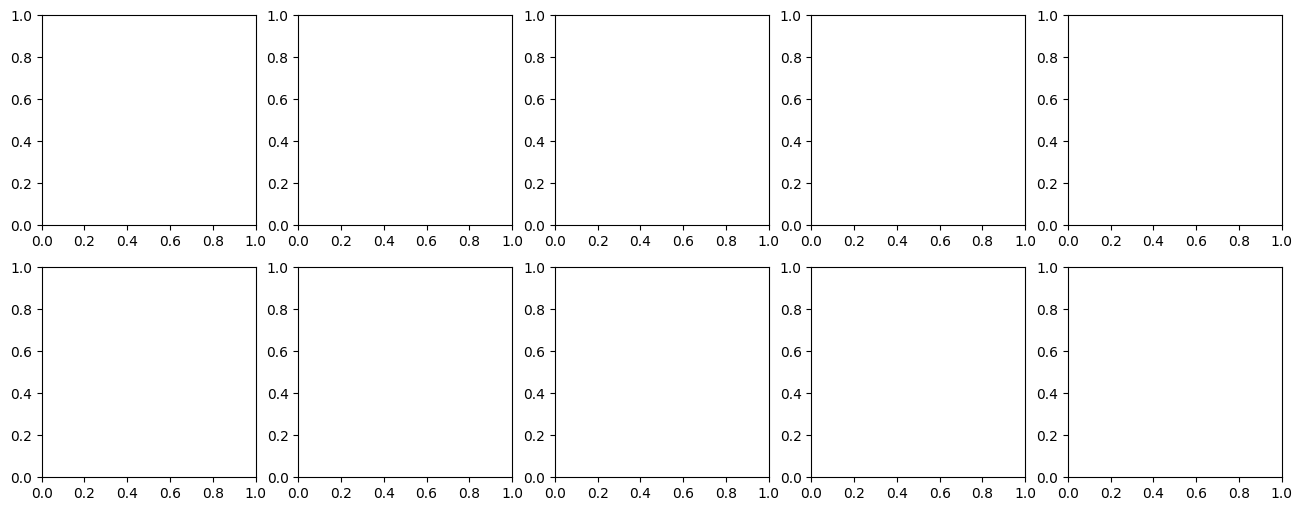

In [83]:
# %%capture

# Run all parameter sets
poi_source_list = ["grid"]
prune_measure_list = ["betweenness"]
parsets_used = list(itertools.product(poi_source_list, prune_measure_list))

for poi_source, prune_measure in parsets_used:
    print(poi_source, prune_measure)
        
        
    for placeid, placeinfo in tqdm(cities.items(), desc="Cities"):
        
        for attr in attrlist:
            
            

        # PLOT Analysis
            filename = placeid + '_poi_' + poi_source + "_" + prune_measure +"_"+attr+ ".csv"
            analysis_result = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)
            if len(analysis_result) == 0: # No plot if no results (for example no railwaystations)
                print(placeid + ": No analysis results available")
                continue

            print(placeid + ": Plotting analysis results")

            # Load existing networks
            G_biketrack = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'biketrack',attr)
            #G_carall = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'carall')
            G_carall = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'carall',attr)
            G_bikeable = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'bikeable',attr)

            #analysis_result = analysis_result2[:40]
            

            #G_biketrack = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'biketrack')
            #G_carall = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'carall')
            #G_bikeable = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'bikeable')


        #     G_biketrack_onstreet = intersect_igraphs(G_biketrack, G_carall)
        #     G_bikeable_onstreet = intersect_igraphs(G_bikeable, G_carall)


            filename = placeid + '_poi_' + poi_source + "_"+ attr+ "_mst.csv"
            analysis_mst_result = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)

            filename = placeid + "_existing.csv"
            analysis_existing = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)

            prune_quantiles_constricted = prune_quantiles
            if plotconstricted:
                f = PATH["results_constricted"] + "results_" + poi_source + "_" + prune_measure + "/metrics_" + poi_source + "_" + prune_measure + "/" + placeid + "_carconstrictedbike_poi_" + poi_source + "_" + prune_measure +"_"+attr+ ".csv"
                if os.path.isfile(f):
                    analysis_result_constricted = np.loadtxt(f, delimiter=',', usecols = (2,3,4,5,6,7,8,9,10), skiprows=1)
                    if np.shape(analysis_result_constricted)[0] == 3: # for large cities we only calculated 3 values
                        prune_quantiles_constricted = [prune_quantiles[19], prune_quantiles[-1]]
            nc = 5
            fig, axes = plt.subplots(nrows = 2, ncols = nc, figsize = (16, 6))
            # Bike network
            keys_metrics = {"length": "Length [km]","coverage": "Coverage [km$^2$]","overlap_biketrack": "Overlap Protected","directness_all_linkwise": "Directness","efficiency_global": "Global Efficiency",
                    "length_lcc": "Length of LCC [km]","poi_coverage": "POIs covered","overlap_bikeable": "Overlap Bikeable","components": "Components","directness": "-"}

            for i, ax in enumerate(axes[0]):
                key = list(keys_metrics.keys())[i]
                if key in ["overlap_biketrack", "overlap_bikeable"]:
                    ax.plot(prune_quantiles, analysis_result[key] / analysis_result["length"], **plotparam_analysis["bikegrown"])
                elif key in ["efficiency_global", "efficiency_local"]:
                    ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown_abstract"])
                    xmin, xmax = ax.get_xlim()
                    tmp, = ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"])  # MST is equivalent for abstract and routed
                    tmp.set_label('_hidden')
                    tmp, = ax.plot(prune_quantiles, analysis_result[key+"_routed"], **plotparam_analysis["bikegrown"])
                    tmp.set_label('_hidden')
                elif key in ["length", "length_lcc"]: # Convert m->km
                    ax.plot(prune_quantiles, analysis_result[key]/1000, **plotparam_analysis["bikegrown"])
                    xmin, xmax = ax.get_xlim()
                    ax.plot([xmin, xmax], [analysis_mst_result[key]/1000, analysis_mst_result[key]/1000], **plotparam_analysis["mst"])
                else:
                    ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown"])
                    xmin, xmax = ax.get_xlim()
                    ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"])

                try:
                    if key in ["length", "length_lcc"]: # Convert m->km
                        tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000, analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000], **plotparam_analysis["biketrack"])
                    else:
                        tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]], analysis_existing[key][analysis_existing_rowkeys["biketrack"]]], **plotparam_analysis["biketrack"])
                    if key in ["efficiency_global", "efficiency_local"]:
                        tmp.set_label('_hidden')

                    if key in ["length", "length_lcc"]: # Convert m->km
                        tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000, analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000], **plotparam_analysis["bikeable"])
                    else:
                        tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]], analysis_existing[key][analysis_existing_rowkeys["bikeable"]]], **plotparam_analysis["bikeable"])
                    if key in ["efficiency_global", "efficiency_local"]:
                        tmp.set_label('_hidden')
                except:
                    pass

                #if key == "efficiency_global" and plotconstricted:
                    #ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 0], **plotparam_analysis["constricted"])

                if i == 0:
                    ymax0 = ax.get_ylim()[1]
                    ax.set_ylim(0, ymax0)
                    ax.text(-0.15, ymax0*1.25, placeinfo['name'] + " (" + poi_source + " | " + prune_measure + ")", fontsize=16, horizontalalignment='left')
                    ax.legend(loc = 'upper left')
                if i == 4:
                    ax.legend(loc = 'best')

                #if key == "directness_all_linkwise" and plotconstricted:
                 #   ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, -1], **plotparam_analysis["constricted"])

                set_analysissubplot(key)
                ax.set_title(list(keys_metrics.values())[i])
                ax.set_xlabel('')
                ax.set_xticklabels([])


            for i, ax in enumerate(axes[1]):
                key = list(keys_metrics.keys())[i+nc]
                if key in ["overlap_biketrack", "overlap_bikeable"]:
                    ax.plot(prune_quantiles, analysis_result[key] / analysis_result["length"], **plotparam_analysis["bikegrown"])
                elif key in ["efficiency_global", "efficiency_local"]:
                    ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown_abstract"])
                    xmin, xmax = ax.get_xlim()
                    ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"]) # MST is equivalent for abstract and routed
                    ax.plot(prune_quantiles, analysis_result[key+"_routed"], **plotparam_analysis["bikegrown"])
                elif key in ["length", "length_lcc"]: # Convert m->km
                    ax.plot(prune_quantiles, analysis_result[key]/1000, **plotparam_analysis["bikegrown"])
                    xmin, xmax = ax.get_xlim()
                    ax.plot([xmin, xmax], [analysis_mst_result[key]/1000, analysis_mst_result[key]/1000], **plotparam_analysis["mst"])
                else:
                    ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown"])
                    xmin, xmax = ax.get_xlim()
                    ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"])
                try:
                    if key in ["length", "length_lcc"]: # Convert m->km
                        ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000, analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000], **plotparam_analysis["biketrack"])
                        ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000, analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000], **plotparam_analysis["bikeable"])
                    else:
                        if not (key == "poi_coverage" and poi_source == "railwaystation"):
                            ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]], analysis_existing[key][analysis_existing_rowkeys["biketrack"]]], **plotparam_analysis["biketrack"])
                            ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]], analysis_existing[key][analysis_existing_rowkeys["bikeable"]]], **plotparam_analysis["bikeable"])
                except:
                    pass
                #if key == "efficiency_local" and plotconstricted:
                #    ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 1], **plotparam_analysis["constricted"])

                if i == 0:
                    ax.set_ylim(0, ymax0)
                set_analysissubplot(key)
                ax.set_title(list(keys_metrics.values())[i+nc])
                ax.set_xlabel(prune_measure + ' quantile')
                if key in ["poi_coverage"]:
                    # https://stackoverflow.com/questions/30914462/matplotlib-how-to-force-integer-tick-labels
                    ax.yaxis.set_major_locator(MaxNLocator(integer=True)) 

            plt.subplots_adjust(top = 0.87, bottom = 0.09, left = 0.05, right = 0.97, wspace = 0.25, hspace = 0.25)
            if plotconstricted:
                fig.savefig(PATH["plots"] + placeid + "/" + attr+"/" + placeid + '_analysis_poi_' + poi_source + "_" + prune_measure +"_"+attr+ '.png', facecolor = "white", edgecolor = 'none')
            else:
                fig.savefig(PATH["plots"] + placeid + "/" + attr+"/" + placeid + '_analysis_poi_' + poi_source + "_" + prune_measure +"_"+attr+ '_noconstr.png', facecolor = "white", edgecolor = 'none')
            plt.close()

## Analysis plot of grown networks together

In [111]:
# %%capture

# Run all parameter sets
poi_source_list = ["grid"]
prune_measure_list = ["betweenness"]
parsets_used = list(itertools.product(poi_source_list, prune_measure_list))

for poi_source, prune_measure in parsets_used:
    print(poi_source, prune_measure)
        
        
    for placeid, placeinfo in tqdm(cities.items(), desc="Cities"):
        
        analysis_results = []
        analysis_mst_results = []
        
        for attr in attrlist:
            
        # PLOT Analysis
            filename = placeid + '_poi_' + poi_source + "_" + prune_measure +"_"+attr+ ".csv"
            analysis_result = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)
            if len(analysis_result) == 0: # No plot if no results (for example no railwaystations)
                print(placeid + ": No analysis results available")
                continue
            
            filename = placeid + '_poi_' + poi_source + "_"+ attr+ "_mst.csv"
            analysis_mst_result = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)
            
            analysis_results.append(analysis_result)
            analysis_mst_results.append(analysis_mst_result)
            
             

            # Load existing networks
        G_biketrack = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'biketrack',attr)
        #G_carall = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'carall')
        G_carall = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'carall',attr)
        G_bikeable = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'bikeable',attr)

        filename = placeid + "_existing.csv"
        analysis_existing = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)
        

        prune_quantiles_constricted = prune_quantiles
        if plotconstricted:
            f = PATH["results_constricted"] + "results_" + poi_source + "_" + prune_measure + "/metrics_" + poi_source + "_" + prune_measure + "/" + placeid + "_carconstrictedbike_poi_" + poi_source + "_" + prune_measure +"_"+attr+ ".csv"
            if os.path.isfile(f):
                analysis_result_constricted = np.loadtxt(f, delimiter=',', usecols = (2,3,4,5,6,7,8,9,10), skiprows=1)
                if np.shape(analysis_result_constricted)[0] == 3: # for large cities we only calculated 3 values
                    prune_quantiles_constricted = [prune_quantiles[19], prune_quantiles[-1]]
        nc = 4
        fig, axes = plt.subplots(nrows = 2, ncols = nc, figsize = (16, 6))
        # Bike network
        keys_metrics = {"length": "Length [km]","coverage": "Coverage [km$^2$]","overlap_biketrack": "Overlap Protected","directness_all_linkwise": "Directness","efficiency_global": "Global Efficiency",
                "length_lcc": "Length of LCC [km]","poi_coverage": "POIs covered","overlap_bikeable": "Overlap Bikeable"}
        for y in range(len(analysis_results)):
            for i, ax in enumerate(axes[0]):
                key = list(keys_metrics.keys())[i]
                if key in ["overlap_biketrack", "overlap_bikeable"]:
                    ax.plot(prune_quantiles, analysis_results[y][key] / analysis_results[y]["length"], **plotparam_analysis["bikegrown"][y])
                elif key in ["efficiency_global", "efficiency_local"]:
                    #ax.plot(prune_quantiles, analysis_results[y][key], **plotparam_analysis["bikegrown_abstract"])
                    xmin, xmax = ax.get_xlim()
                    #tmp, = ax.plot([xmin, xmax], [analysis_mst_results[y][key], analysis_mst_results[y][key]], **plotparam_analysis["mst"])  # MST is equivalent for abstract and routed
                    tmp.set_label('_hidden')
                    tmp, = ax.plot(prune_quantiles, analysis_results[y][key+"_routed"], **plotparam_analysis["bikegrown"][y])
                    tmp.set_label('_hidden')
                elif key in ["length", "length_lcc"]: # Convert m->km
                    ax.plot(prune_quantiles, analysis_results[y][key]/1000, **plotparam_analysis["bikegrown"][y])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key]/1000, analysis_mst_results[y][key]/1000], **plotparam_analysis["mst"])
                else:
                    ax.plot(prune_quantiles, analysis_results[y][key], **plotparam_analysis["bikegrown"][y])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key], analysis_mst_results[y][key]], **plotparam_analysis["mst"])

                #try:
                    #if key in ["length", "length_lcc"]: # Convert m->km
                        #tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000, analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000], **plotparam_analysis["biketrack"])
                    #else:
                        #tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]], analysis_existing[key][analysis_existing_rowkeys["biketrack"]]], **plotparam_analysis["biketrack"])
                    #if key in ["efficiency_global", "efficiency_local"]:
                        #tmp.set_label('_hidden')

                    #if key in ["length", "length_lcc"]: # Convert m->km
                        #tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000, analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000], **plotparam_analysis["bikeable"])
                    #else:
                        #tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]], analysis_existing[key][analysis_existing_rowkeys["bikeable"]]], **plotparam_analysis["bikeable"])
                    #if key in ["efficiency_global", "efficiency_local"]:
                        #tmp.set_label('_hidden')
                #except:
                    #pass

                if key == "efficiency_global" and plotconstricted:
                    ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 0], **plotparam_analysis["constricted"])

                if i == 0:
                    ymax0 = ax.get_ylim()[1]
                    ax.set_ylim(0, ymax0)
                    ax.text(-0.15, ymax0*1.25, placeinfo['name'] + " (" + poi_source + " | " + prune_measure + ") " + "Grown Networks", fontsize=16, horizontalalignment='left')
                    ax.legend(loc = 'upper left')

                if key == "directness_all_linkwise" and plotconstricted:
                    ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, -1], **plotparam_analysis["constricted"])

                set_analysissubplot(key)
                ax.set_title(list(keys_metrics.values())[i])
                ax.set_xlabel('')
                ax.set_xticklabels([])

        for y in range(len(analysis_results)):
            for i, ax in enumerate(axes[1]):
                key = list(keys_metrics.keys())[i+nc]
                if key in ["overlap_biketrack", "overlap_bikeable"]:
                    ax.plot(prune_quantiles, analysis_results[y][key] / analysis_results[y]["length"], **plotparam_analysis["bikegrown"][y])
                elif key in ["efficiency_global", "efficiency_local"]:
                    #ax.plot(prune_quantiles, analysis_results[y][key], **plotparam_analysis["bikegrown_abstract"])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key], analysis_mst_results[y][key]], **plotparam_analysis["mst"]) # MST is equivalent for abstract and routed
                    ax.plot(prune_quantiles, analysis_results[y][key+"_routed"], **plotparam_analysis["bikegrown"][y])
                elif key in ["length", "length_lcc"]: # Convert m->km
                    ax.plot(prune_quantiles, analysis_results[y][key]/1000, **plotparam_analysis["bikegrown"][y])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key]/1000, analysis_mst_results[y][key]/1000], **plotparam_analysis["mst"])
                else:
                    ax.plot(prune_quantiles, analysis_results[y][key], **plotparam_analysis["bikegrown"][y])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key], analysis_mst_results[y][key]], **plotparam_analysis["mst"])
                #try:
                    #if key in ["length", "length_lcc"]: # Convert m->km
                        #ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000, analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000], **plotparam_analysis["biketrack"])
                        #ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000, analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000], **plotparam_analysis["bikeable"])
                    #else:
                        #if not (key == "poi_coverage" and poi_source == "railwaystation"):
                            #ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]], analysis_existing[key][analysis_existing_rowkeys["biketrack"]]], **plotparam_analysis["biketrack"])
                            #ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]], analysis_existing[key][analysis_existing_rowkeys["bikeable"]]], **plotparam_analysis["bikeable"])
                #except:
                    #pass
                if key == "efficiency_local" and plotconstricted:
                    ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 1], **plotparam_analysis["constricted"])

                if i == 1:
                    ax.set_ylim(0, ymax0)
                #if i == 0:
                #    ax.legend(loc = 'best')
                set_analysissubplot(key)
                ax.set_title(list(keys_metrics.values())[i+nc])
                ax.set_xlabel(prune_measure + ' quantile')
                if key in ["poi_coverage"]:
                    # https://stackoverflow.com/questions/30914462/matplotlib-how-to-force-integer-tick-labels
                    ax.yaxis.set_major_locator(MaxNLocator(integer=True)) 

            plt.subplots_adjust(top = 0.87, bottom = 0.09, left = 0.05, right = 0.97, wspace = 0.25, hspace = 0.25)
        if plotconstricted:
            fig.savefig(PATH["plots"] + placeid + "/" + attr+"/" + placeid + '_analysis_poi_' + poi_source + "_" + prune_measure +"_"+attr+ '.png', facecolor = "white", edgecolor = 'none')
        else:
            fig.savefig(PATH["plots"] + placeid + "/" + placeid + '_analysis_poi_' + poi_source + "_" + prune_measure +"_"+attr+ '_noconstr.png', facecolor = "white", edgecolor = 'none')
        plt.close()

grid betweenness


Cities:   0%|          | 0/1 [00:00<?, ?it/s]

In [109]:
# %%capture

# Run all parameter sets
poi_source_list = ["grid"]
prune_measure_list = ["betweenness"]
parsets_used = list(itertools.product(poi_source_list, prune_measure_list))

for poi_source, prune_measure in parsets_used:
    print(poi_source, prune_measure)
        
        
    for placeid, placeinfo in tqdm(cities.items(), desc="Cities"):
        
        analysis_results = []
        analysis_mst_results = []
        
        for attr in attrlist:
            
        # PLOT Analysis
            filename = placeid + '_poi_' + poi_source + "_" + prune_measure +"_"+attr+ ".csv"
            analysis_result = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)
            if len(analysis_result) == 0: # No plot if no results (for example no railwaystations)
                print(placeid + ": No analysis results available")
                continue
            
            filename = placeid + '_poi_' + poi_source + "_"+ attr+ "_mst.csv"
            analysis_mst_result = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)
            
            analysis_results.append(analysis_result)
            analysis_mst_results.append(analysis_mst_result)
            
             

            # Load existing networks
        G_biketrack = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'biketrack',attr)
        #G_carall = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'carall')
        G_carall = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'carall',attr)
        G_bikeable = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'bikeable',attr)

        filename = placeid + "_existing.csv"
        analysis_existing = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)
        

        prune_quantiles_constricted = prune_quantiles
        if plotconstricted:
            f = PATH["results_constricted"] + "results_" + poi_source + "_" + prune_measure + "/metrics_" + poi_source + "_" + prune_measure + "/" + placeid + "_carconstrictedbike_poi_" + poi_source + "_" + prune_measure +"_"+attr+ ".csv"
            if os.path.isfile(f):
                analysis_result_constricted = np.loadtxt(f, delimiter=',', usecols = (2,3,4,5,6,7,8,9,10), skiprows=1)
                if np.shape(analysis_result_constricted)[0] == 3: # for large cities we only calculated 3 values
                    prune_quantiles_constricted = [prune_quantiles[19], prune_quantiles[-1]]
        nc = 2
        fig, axes = plt.subplots(nrows = 4, ncols = nc, figsize = (16, 6))
        # Bike network
        keys_metrics = {"length": "Length [km]","coverage": "Coverage [km$^2$]","overlap_biketrack": "Overlap Protected","directness_all_linkwise": "Directness","efficiency_global": "Global Efficiency",
                "length_lcc": "Length of LCC [km]","poi_coverage": "POIs covered","overlap_bikeable": "Overlap Bikeable"}
        for y in range(len(analysis_results)):
            for i, ax in enumerate(axes[0]):
                key = list(keys_metrics.keys())[i]
                if key in ["overlap_biketrack", "overlap_bikeable"]:
                    ax.plot(prune_quantiles, analysis_results[y][key] / analysis_results[y]["length"], **plotparam_analysis["bikegrown"][y])
                elif key in ["efficiency_global", "efficiency_local"]:
                    ax.plot(prune_quantiles, analysis_results[y][key], **plotparam_analysis["bikegrown_abstract"])
                    xmin, xmax = ax.get_xlim()
                    #tmp, = ax.plot([xmin, xmax], [analysis_mst_results[y][key], analysis_mst_results[y][key]], **plotparam_analysis["mst"])  # MST is equivalent for abstract and routed
                    tmp.set_label('_hidden')
                    tmp, = ax.plot(prune_quantiles, analysis_results[y][key+"_routed"], **plotparam_analysis["bikegrown"][y])
                    tmp.set_label('_hidden')
                elif key in ["length", "length_lcc"]: # Convert m->km
                    ax.plot(prune_quantiles, analysis_results[y][key]/1000, **plotparam_analysis["bikegrown"][y])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key]/1000, analysis_mst_results[y][key]/1000], **plotparam_analysis["mst"])
                else:
                    ax.plot(prune_quantiles, analysis_results[y][key], **plotparam_analysis["bikegrown"][y])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key], analysis_mst_results[y][key]], **plotparam_analysis["mst"])

                if key == "efficiency_global" and plotconstricted:
                    ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 0], **plotparam_analysis["constricted"])

                if i == 0:
                    ymax0 = ax.get_ylim()[1]
                    ax.set_ylim(0, ymax0)
                    ax.text(-0.15, ymax0*1.25, placeinfo['name'] + " (" + poi_source + " | " + prune_measure + ") " + "Grown Networks", fontsize=16, horizontalalignment='left')
                    ax.legend(loc = 'upper left')
                if i == 4:
                    ax.legend(loc = 'best')

                if key == "directness_all_linkwise" and plotconstricted:
                    ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, -1], **plotparam_analysis["constricted"])

                set_analysissubplot(key)
                ax.set_title(list(keys_metrics.values())[i])
                ax.set_xlabel('')
                ax.set_xticklabels([])
        for y in range(len(analysis_results)):
            for i, ax in enumerate(axes[1]):
                key = list(keys_metrics.keys())[i+nc]
                if key in ["overlap_biketrack", "overlap_bikeable"]:
                    ax.plot(prune_quantiles, analysis_results[y][key] / analysis_results[y]["length"], **plotparam_analysis["bikegrown"][y])
                elif key in ["efficiency_global", "efficiency_local"]:
                    ax.plot(prune_quantiles, analysis_results[y][key], **plotparam_analysis["bikegrown_abstract"])
                    xmin, xmax = ax.get_xlim()
                    #tmp, = ax.plot([xmin, xmax], [analysis_mst_results[y][key], analysis_mst_results[y][key]], **plotparam_analysis["mst"])  # MST is equivalent for abstract and routed
                    tmp.set_label('_hidden')
                    tmp, = ax.plot(prune_quantiles, analysis_results[y][key+"_routed"], **plotparam_analysis["bikegrown"][y])
                    tmp.set_label('_hidden')
                elif key in ["length", "length_lcc"]: # Convert m->km
                    ax.plot(prune_quantiles, analysis_results[y][key]/1000, **plotparam_analysis["bikegrown"][y])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key]/1000, analysis_mst_results[y][key]/1000], **plotparam_analysis["mst"])
                else:
                    ax.plot(prune_quantiles, analysis_results[y][key], **plotparam_analysis["bikegrown"][y])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key], analysis_mst_results[y][key]], **plotparam_analysis["mst"])

                if key == "efficiency_global" and plotconstricted:
                    ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 0], **plotparam_analysis["constricted"])

                #if i == 0:
                #    ymax0 = ax.get_ylim()[1]
                #    ax.set_ylim(0, ymax0)
                #    ax.text(-0.15, ymax0*1.25, placeinfo['name'] + " (" + poi_source + " | " + prune_measure + ") " + "Grown Networks", fontsize=16, horizontalalignment='left')
                #    ax.legend(loc = 'upper left')
                #if i == 4:
                #    ax.legend(loc = 'best')

                if key == "directness_all_linkwise" and plotconstricted:
                    ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, -1], **plotparam_analysis["constricted"])

                set_analysissubplot(key)
                ax.set_title(list(keys_metrics.values())[i+nc])
                ax.set_xlabel('')
                ax.set_xticklabels([])


        for y in range(len(analysis_results)):
            for i, ax in enumerate(axes[2]):
                key = list(keys_metrics.keys())[i+(2*nc)]
                if key in ["overlap_biketrack", "overlap_bikeable"]:
                    ax.plot(prune_quantiles, analysis_results[y][key] / analysis_results[y]["length"], **plotparam_analysis["bikegrown"][y])
                elif key in ["efficiency_global", "efficiency_local"]:
                    ax.plot(prune_quantiles, analysis_results[y][key], **plotparam_analysis["bikegrown_abstract"])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key], analysis_mst_results[y][key]], **plotparam_analysis["mst"]) # MST is equivalent for abstract and routed
                    ax.plot(prune_quantiles, analysis_results[y][key+"_routed"], **plotparam_analysis["bikegrown"][y])
                elif key in ["length", "length_lcc"]: # Convert m->km
                    ax.plot(prune_quantiles, analysis_results[y][key]/1000, **plotparam_analysis["bikegrown"][y])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key]/1000, analysis_mst_results[y][key]/1000], **plotparam_analysis["mst"])
                else:
                    ax.plot(prune_quantiles, analysis_results[y][key], **plotparam_analysis["bikegrown"][y])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key], analysis_mst_results[y][key]], **plotparam_analysis["mst"])
                #try:
                    #if key in ["length", "length_lcc"]: # Convert m->km
                        #ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000, analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000], **plotparam_analysis["biketrack"])
                        #ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000, analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000], **plotparam_analysis["bikeable"])
                    #else:
                        #if not (key == "poi_coverage" and poi_source == "railwaystation"):
                            #ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]], analysis_existing[key][analysis_existing_rowkeys["biketrack"]]], **plotparam_analysis["biketrack"])
                            #ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]], analysis_existing[key][analysis_existing_rowkeys["bikeable"]]], **plotparam_analysis["bikeable"])
                #except:
                    #pass
                if key == "efficiency_local" and plotconstricted:
                    ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 1], **plotparam_analysis["constricted"])
                #if i == 0:
                #    ax.legend(loc = 'best')
                #if i == 1:
                #    ax.set_ylim(0, ymax0)
                
                set_analysissubplot(key)
                ax.set_title(list(keys_metrics.values())[i+(2*nc)])
                ax.set_xlabel(prune_measure + ' quantile')
                if key in ["poi_coverage"]:
                    # https://stackoverflow.com/questions/30914462/matplotlib-how-to-force-integer-tick-labels
                    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
                    
        for y in range(len(analysis_results)):
            for i, ax in enumerate(axes[3]):
                key = list(keys_metrics.keys())[i+(3*nc)]
                if key in ["overlap_biketrack", "overlap_bikeable"]:
                    ax.plot(prune_quantiles, analysis_results[y][key] / analysis_results[y]["length"], **plotparam_analysis["bikegrown"][y])
                elif key in ["efficiency_global", "efficiency_local"]:
                    ax.plot(prune_quantiles, analysis_results[y][key], **plotparam_analysis["bikegrown_abstract"])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key], analysis_mst_results[y][key]], **plotparam_analysis["mst"]) # MST is equivalent for abstract and routed
                    ax.plot(prune_quantiles, analysis_results[y][key+"_routed"], **plotparam_analysis["bikegrown"][y])
                elif key in ["length", "length_lcc"]: # Convert m->km
                    ax.plot(prune_quantiles, analysis_results[y][key]/1000, **plotparam_analysis["bikegrown"][y])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key]/1000, analysis_mst_results[y][key]/1000], **plotparam_analysis["mst"])
                else:
                    ax.plot(prune_quantiles, analysis_results[y][key], **plotparam_analysis["bikegrown"][y])
                    xmin, xmax = ax.get_xlim()
                    #ax.plot([xmin, xmax], [analysis_mst_results[y][key], analysis_mst_results[y][key]], **plotparam_analysis["mst"])
                #try:
                    #if key in ["length", "length_lcc"]: # Convert m->km
                        #ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000, analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000], **plotparam_analysis["biketrack"])
                        #ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000, analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000], **plotparam_analysis["bikeable"])
                    #else:
                        #if not (key == "poi_coverage" and poi_source == "railwaystation"):
                            #ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]], analysis_existing[key][analysis_existing_rowkeys["biketrack"]]], **plotparam_analysis["biketrack"])
                            #ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]], analysis_existing[key][analysis_existing_rowkeys["bikeable"]]], **plotparam_analysis["bikeable"])
                #except:
                    #pass
                if key == "efficiency_local" and plotconstricted:
                    ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 1], **plotparam_analysis["constricted"])
                #if i == 0:
                #    ax.legend(loc = 'best')
       
                
                set_analysissubplot(key)
                ax.set_title(list(keys_metrics.values())[i+(3*nc)])
                ax.set_xlabel(prune_measure + ' quantile')
                if key in ["poi_coverage"]:
                    # https://stackoverflow.com/questions/30914462/matplotlib-how-to-force-integer-tick-labels
                    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  

        plt.subplots_adjust(top = 2.87, bottom = 0.09, left = 0.05, right = 0.97, wspace = 0.25, hspace = 0.25)
        if plotconstricted:
            fig.savefig(PATH["plots"] + placeid + "/" + attr+"/" + placeid + '_analysis_poi_' + poi_source + "_" + prune_measure +"_"+attr+ '.png', facecolor = "white", edgecolor = 'none')
        else:
            fig.savefig(PATH["plots"] + placeid + "/" + placeid + '_analysis_poi_' + poi_source + "_" + prune_measure +"_"+attr+ '_noconstr.png', facecolor = "white", edgecolor = 'none')
        plt.close()

grid betweenness


Cities:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
len(plotparam_analysis["bikegrown"])

5

In [57]:
             

            # Load existing networks
        G_biketrack = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'biketrack',attr)
        #G_carall = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'carall')
        G_carall = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'carall',attr)
        G_bikeable = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'bikeable',attr)

        filename = placeid + "_existing.csv"
        analysis_existing = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)

        prune_quantiles_constricted = prune_quantiles
        if plotconstricted:
            f = PATH["results_constricted"] + "results_" + poi_source + "_" + prune_measure + "/metrics_" + poi_source + "_" + prune_measure + "/" + placeid + "_carconstrictedbike_poi_" + poi_source + "_" + prune_measure +"_"+attr+ ".csv"
            if os.path.isfile(f):
                analysis_result_constricted = np.loadtxt(f, delimiter=',', usecols = (2,3,4,5,6,7,8,9,10), skiprows=1)
                if np.shape(analysis_result_constricted)[0] == 3: # for large cities we only calculated 3 values
                    prune_quantiles_constricted = [prune_quantiles[19], prune_quantiles[-1]]
        nc = 5
        fig, axes = plt.subplots(nrows = 2, ncols = nc, figsize = (16, 6))
        # Bike network
        keys_metrics = {"length": "Length [km]","coverage": "Coverage [km$^2$]","overlap_biketrack": "Overlap Protected","directness_all_linkwise": "Directness","efficiency_global": "Global Efficiency",
                "length_lcc": "Length of LCC [km]","poi_coverage": "POIs covered","overlap_bikeable": "Overlap Bikeable","components": "Components","directness": "-"}

        for i, ax in enumerate(axes[0]):
            key = list(keys_metrics.keys())[i]
            if key in ["overlap_biketrack", "overlap_bikeable"]:
                ax.plot(prune_quantiles, analysis_result[key] / analysis_result["length"], **plotparam_analysis["bikegrown"])
            elif key in ["efficiency_global", "efficiency_local"]:
                ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown_abstract"])
                xmin, xmax = ax.get_xlim()
                tmp, = ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"])  # MST is equivalent for abstract and routed
                tmp.set_label('_hidden')
                tmp, = ax.plot(prune_quantiles, analysis_result[key+"_routed"], **plotparam_analysis["bikegrown"])
                tmp.set_label('_hidden')
            elif key in ["length", "length_lcc"]: # Convert m->km
                ax.plot(prune_quantiles, analysis_result[key]/1000, **plotparam_analysis["bikegrown"])
                xmin, xmax = ax.get_xlim()
                ax.plot([xmin, xmax], [analysis_mst_result[key]/1000, analysis_mst_result[key]/1000], **plotparam_analysis["mst"])
            else:
                ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown"])
                xmin, xmax = ax.get_xlim()
                ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"])

            try:
                if key in ["length", "length_lcc"]: # Convert m->km
                    tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000, analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000], **plotparam_analysis["biketrack"])
                else:
                    tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]], analysis_existing[key][analysis_existing_rowkeys["biketrack"]]], **plotparam_analysis["biketrack"])
                if key in ["efficiency_global", "efficiency_local"]:
                    tmp.set_label('_hidden')

                if key in ["length", "length_lcc"]: # Convert m->km
                    tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000, analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000], **plotparam_analysis["bikeable"])
                else:
                    tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]], analysis_existing[key][analysis_existing_rowkeys["bikeable"]]], **plotparam_analysis["bikeable"])
                if key in ["efficiency_global", "efficiency_local"]:
                    tmp.set_label('_hidden')
            except:
                pass

            if key == "efficiency_global" and plotconstricted:
                ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 0], **plotparam_analysis["constricted"])

            if i == 0:
                ymax0 = ax.get_ylim()[1]
                ax.set_ylim(0, ymax0)
                ax.text(-0.15, ymax0*1.25, placeinfo['name'] + " (" + poi_source + " | " + prune_measure + ")", fontsize=16, horizontalalignment='left')
                ax.legend(loc = 'upper left')
            if i == 4:
                ax.legend(loc = 'best')

            if key == "directness_all_linkwise" and plotconstricted:
                ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, -1], **plotparam_analysis["constricted"])

            set_analysissubplot(key)
            ax.set_title(list(keys_metrics.values())[i])
            ax.set_xlabel('')
            ax.set_xticklabels([])


        for i, ax in enumerate(axes[1]):
            key = list(keys_metrics.keys())[i+nc]
            if key in ["overlap_biketrack", "overlap_bikeable"]:
                ax.plot(prune_quantiles, analysis_result[key] / analysis_result["length"], **plotparam_analysis["bikegrown"])
            elif key in ["efficiency_global", "efficiency_local"]:
                ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown_abstract"])
                xmin, xmax = ax.get_xlim()
                ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"]) # MST is equivalent for abstract and routed
                ax.plot(prune_quantiles, analysis_result[key+"_routed"], **plotparam_analysis["bikegrown"])
            elif key in ["length", "length_lcc"]: # Convert m->km
                ax.plot(prune_quantiles, analysis_result[key]/1000, **plotparam_analysis["bikegrown"])
                xmin, xmax = ax.get_xlim()
                ax.plot([xmin, xmax], [analysis_mst_result[key]/1000, analysis_mst_result[key]/1000], **plotparam_analysis["mst"])
            else:
                ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown"])
                xmin, xmax = ax.get_xlim()
                ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"])
            try:
                if key in ["length", "length_lcc"]: # Convert m->km
                    ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000, analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000], **plotparam_analysis["biketrack"])
                    ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000, analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000], **plotparam_analysis["bikeable"])
                else:
                    if not (key == "poi_coverage" and poi_source == "railwaystation"):
                        ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]], analysis_existing[key][analysis_existing_rowkeys["biketrack"]]], **plotparam_analysis["biketrack"])
                        ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]], analysis_existing[key][analysis_existing_rowkeys["bikeable"]]], **plotparam_analysis["bikeable"])
            except:
                pass
            if key == "efficiency_local" and plotconstricted:
                ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 1], **plotparam_analysis["constricted"])

            if i == 0:
                ax.set_ylim(0, ymax0)
            set_analysissubplot(key)
            ax.set_title(list(keys_metrics.values())[i+nc])
            ax.set_xlabel(prune_measure + ' quantile')
            if key in ["poi_coverage"]:
                # https://stackoverflow.com/questions/30914462/matplotlib-how-to-force-integer-tick-labels
                ax.yaxis.set_major_locator(MaxNLocator(integer=True)) 

        plt.subplots_adjust(top = 0.87, bottom = 0.09, left = 0.05, right = 0.97, wspace = 0.25, hspace = 0.25)
        if plotconstricted:
            fig.savefig(PATH["plots"] + placeid + "/" + attr+"/" + placeid + '_analysis_poi_' + poi_source + "_" + prune_measure +"_"+attr+ '.png', facecolor = "white", edgecolor = 'none')
        else:
            fig.savefig(PATH["plots"] + placeid + "/" + attr+"/" + placeid + '_analysis_poi_' + poi_source + "_" + prune_measure +"_"+attr+ '_noconstr.png', facecolor = "white", edgecolor = 'none')
        plt.close()

IndentationError: unexpected indent (3476466700.py, line 2)

In [ ]:
enumerate(axes[1])

In [9]:
analysis_existing[key][analysis_existing_rowkeys["biketrack"]]

0.4683190305644334

In [30]:
type(analysis_result)

numpy.ndarray

In [ ]:
prune_quantiles = [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
len(analysis_result["overlap_biketrack"])

In [ ]:
ana

In [ ]:
len(axes[1])

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (16, 12))

In [ ]:
list(keys_metrics.keys())

In [ ]:
axes[1][0]

In [ ]:
for i, ax in enumerate(axes[1]):
    print(i)
    print(ax)

In [ ]:
analysis_result

In [ ]:
for i, ax in enumerate(axes[1]):
                key = list(keys_metrics.keys())[i]
                if key in ["overlap_biketrack", "overlap_bikeable"]:
                    ax.plot(prune_quantiles, analysis_result[key] / analysis_result["length"], **plotparam_analysis["bikegrown"])
                elif key in ["efficiency_global", "efficiency_local"]:
                    ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown_abstract"])
                    xmin, xmax = ax.get_xlim()
                    ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"]) # MST is equivalent for abstract and routed
                    ax.plot(prune_quantiles, analysis_result[key+"_routed"], **plotparam_analysis["bikegrown"])
                elif key in ["length", "length_lcc"]: # Convert m->km
                    ax.plot(prune_quantiles, analysis_result[key]/1000, **plotparam_analysis["bikegrown"])
                    xmin, xmax = ax.get_xlim()
                    ax.plot([xmin, xmax], [analysis_mst_result[key]/1000, analysis_mst_result[key]/1000], **plotparam_analysis["mst"])
                else:
                    ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown"])
                    xmin, xmax = ax.get_xlim()
                    ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"])
                try:
                    if key in ["length", "length_lcc"]: # Convert m->km
                        ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000, analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000], **plotparam_analysis["biketrack"])
                        ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000, analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000], **plotparam_analysis["bikeable"])
                    else:
                        if not (key == "poi_coverage" and poi_source == "railwaystation"):
                            ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]], analysis_existing[key][analysis_existing_rowkeys["biketrack"]]], **plotparam_analysis["biketrack"])
                            ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]], analysis_existing[key][analysis_existing_rowkeys["bikeable"]]], **plotparam_analysis["bikeable"])
                except:
                    pass
                if key == "efficiency_local" and plotconstricted:
                    ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 1], **plotparam_analysis["constricted"])

                if i == 0:
                    ax.set_ylim(0, ymax0)
                set_analysissubplot(key)
                ax.set_title(list(keys_metrics.values())[i+nc])
                ax.set_xlabel(prune_measure + ' quantile')
                if key in ["poi_coverage"]:
                    # https://stackoverflow.com/questions/30914462/matplotlib-how-to-force-integer-tick-labels
                    ax.yaxis.set_major_locator(MaxNLocator(integer=True)) 


In [ ]:
# %%capture

# Run all parameter sets
poi_source_list = ["grid", "railwaystation"]
prune_measure_list = ["betweenness"]
parsets_used = list(itertools.product(poi_source_list, prune_measure_list))

for poi_source, prune_measure in parsets_used:
    print(poi_source, prune_measure)
        
        
    for placeid, placeinfo in tqdm(cities.items(), desc="Cities"):

        # PLOT Analysis
        filename = placeid + '_poi_' + poi_source + "_" + prune_measure + ".csv"
        analysis_result = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)
        if len(analysis_result) == 0: # No plot if no results (for example no railwaystations)
            print(placeid + ": No analysis results available")
            continue

        print(placeid + ": Plotting analysis results")

        # Load existing networks
        G_biketrack = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'biketrack')
        #G_carall = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'carall')
        G_carall = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'carall')
        G_bikeable = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'bikeable')
        
        #G_biketrack = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'biketrack')
        #G_carall = csv_to_ig(PATH["data"] +$ placeid + "/", placeid, 'carall')
        #G_bikeable = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'bikeable')
        
        
    #     G_biketrack_onstreet = intersect_igraphs(G_biketrack, G_carall)
    #     G_bikeable_onstreet = intersect_igraphs(G_bikeable, G_carall)


        filename = placeid + '_poi_' + poi_source + "_mst.csv"
        analysis_mst_result = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)

        filename = placeid + "_existing.csv"
        analysis_existing = np.genfromtxt(PATH["results"] + placeid + "/" + filename, delimiter=',', names=True)
        
        prune_quantiles_constricted = prune_quantiles
        if plotconstricted:
            f = PATH["results_constricted"] + "results_" + poi_source + "_" + prune_measure + "/metrics_" + poi_source + "_" + prune_measure + "/" + placeid + "_carconstrictedbike_poi_" + poi_source + "_" + prune_measure + ".csv"
            if os.path.isfile(f):
                analysis_result_constricted = np.loadtxt(f, delimiter=',', usecols = (2,3,4,5,6,7,8,9,10), skiprows=1)
                if np.shape(analysis_result_constricted)[0] == 3: # for large cities we only calculated 3 values
                    prune_quantiles_constricted = [prune_quantiles[19], prune_quantiles[-1]]
                    
        nc = 5
        fig, axes = plt.subplots(nrows = 2, ncols = nc, figsize = (16, 6))
        # Bike network
        keys_metrics = {"length": "Length [km]","coverage": "Coverage [km$^2$]","overlap_biketrack": "Overlap Protected","directness_all_linkwise": "Directness","efficiency_global": "Global Efficiency",
                "length_lcc": "Length of LCC [km]","poi_coverage": "POIs covered","overlap_bikeable": "Overlap Bikeable","components": "Components","efficiency_local": "Local Efficiency"}
        
        for i, ax in enumerate(axes[0]):
            key = list(keys_metrics.keys())[i]
            if key in ["overlap_biketrack", "overlap_bikeable"]:
                ax.plot(prune_quantiles, analysis_result[key] / analysis_result["length"], **plotparam_analysis["bikegrown"])
            elif key in ["efficiency_global", "efficiency_local"]:
                ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown_abstract"])
                xmin, xmax = ax.get_xlim()
                tmp, = ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"])  # MST is equivalent for abstract and routed
                tmp.set_label('_hidden')
                tmp, = ax.plot(prune_quantiles, analysis_result[key+"_routed"], **plotparam_analysis["bikegrown"])
                tmp.set_label('_hidden')
            elif key in ["length", "length_lcc"]: # Convert m->km
                ax.plot(prune_quantiles, analysis_result[key]/1000, **plotparam_analysis["bikegrown"])
                xmin, xmax = ax.get_xlim()
                ax.plot([xmin, xmax], [analysis_mst_result[key]/1000, analysis_mst_result[key]/1000], **plotparam_analysis["mst"])
            else:
                ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown"])
                xmin, xmax = ax.get_xlim()
                ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"])
                
            try:
                if key in ["length", "length_lcc"]: # Convert m->km
                    tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000, analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000], **plotparam_analysis["biketrack"])
                else:
                    tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]], analysis_existing[key][analysis_existing_rowkeys["biketrack"]]], **plotparam_analysis["biketrack"])
                if key in ["efficiency_global", "efficiency_local"]:
                    tmp.set_label('_hidden')

                if key in ["length", "length_lcc"]: # Convert m->km
                    tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000, analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000], **plotparam_analysis["bikeable"])
                else:
                    tmp, = ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]], analysis_existing[key][analysis_existing_rowkeys["bikeable"]]], **plotparam_analysis["bikeable"])
                if key in ["efficiency_global", "efficiency_local"]:
                    tmp.set_label('_hidden')
            except:
                pass

            if key == "efficiency_global" and plotconstricted:
                ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 0], **plotparam_analysis["constricted"])

            if i == 0:
                ymax0 = ax.get_ylim()[1]
                ax.set_ylim(0, ymax0)
                ax.text(-0.15, ymax0*1.25, placeinfo['name'] + " (" + poi_source + " | " + prune_measure + ")", fontsize=16, horizontalalignment='left')
                ax.legend(loc = 'upper left')
            if i == 4:
                ax.legend(loc = 'best')

            if key == "directness_all_linkwise" and plotconstricted:
                ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, -1], **plotparam_analysis["constricted"])

            set_analysissubplot(key)
            ax.set_title(list(keys_metrics.values())[i])
            ax.set_xlabel('')
            ax.set_xticklabels([])


        for i, ax in enumerate(axes[1]):
            key = list(keys_metrics.keys())[i+nc]
            if key in ["overlap_biketrack", "overlap_bikeable"]:
                ax.plot(prune_quantiles, analysis_result[key] / analysis_result["length"], **plotparam_analysis["bikegrown"])
            elif key in ["efficiency_global", "efficiency_local"]:
                ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown_abstract"])
                xmin, xmax = ax.get_xlim()
                ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"]) # MST is equivalent for abstract and routed
                ax.plot(prune_quantiles, analysis_result[key+"_routed"], **plotparam_analysis["bikegrown"])
            elif key in ["length", "length_lcc"]: # Convert m->km
                ax.plot(prune_quantiles, analysis_result[key]/1000, **plotparam_analysis["bikegrown"])
                xmin, xmax = ax.get_xlim()
                ax.plot([xmin, xmax], [analysis_mst_result[key]/1000, analysis_mst_result[key]/1000], **plotparam_analysis["mst"])
            else:
                ax.plot(prune_quantiles, analysis_result[key], **plotparam_analysis["bikegrown"])
                xmin, xmax = ax.get_xlim()
                ax.plot([xmin, xmax], [analysis_mst_result[key], analysis_mst_result[key]], **plotparam_analysis["mst"])
            try:
                if key in ["length", "length_lcc"]: # Convert m->km
                    ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000, analysis_existing[key][analysis_existing_rowkeys["biketrack"]]/1000], **plotparam_analysis["biketrack"])
                    ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000, analysis_existing[key][analysis_existing_rowkeys["bikeable"]]/1000], **plotparam_analysis["bikeable"])
                else:
                    if not (key == "poi_coverage" and poi_source == "railwaystation"):
                        ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["biketrack"]], analysis_existing[key][analysis_existing_rowkeys["biketrack"]]], **plotparam_analysis["biketrack"])
                        ax.plot([xmin, xmax], [analysis_existing[key][analysis_existing_rowkeys["bikeable"]], analysis_existing[key][analysis_existing_rowkeys["bikeable"]]], **plotparam_analysis["bikeable"])
            except:
                pass
            if key == "efficiency_local" and plotconstricted:
                ax.plot([0]+prune_quantiles_constricted, analysis_result_constricted[:, 1], **plotparam_analysis["constricted"])

            if i == 0:
                ax.set_ylim(0, ymax0)
            set_analysissubplot(key)
            ax.set_title(list(keys_metrics.values())[i+nc])
            ax.set_xlabel(prune_measure + ' quantile')
            if key in ["poi_coverage"]:
                # https://stackoverflow.com/questions/30914462/matplotlib-how-to-force-integer-tick-labels
                ax.yaxis.set_major_locator(MaxNLocator(integer=True)) 

        plt.subplots_adjust(top = 0.87, bottom = 0.09, left = 0.05, right = 0.97, wspace = 0.25, hspace = 0.25)
        if plotconstricted:
            fig.savefig(PATH["plots"] + placeid + "/" + placeid + '_analysis_poi_' + poi_source + "_" + prune_measure + '.png', facecolor = "white", edgecolor = 'none')
        else:
            fig.savefig(PATH["plots"] + placeid + "/" + placeid + '_analysis_poi_' + poi_source + "_" + prune_measure + '_noconstr.png', facecolor = "white", edgecolor = 'none')
        plt.close()

### Constricted analysis plots

### Network plots

#### Existing networks (VIRKER!)

In [ ]:
# %%capture

for placeid, placeinfo in tqdm(cities.items(), desc = "Cities"):
    print(placeid + ": Plotting networks")
    
    if prune_measure == "betweenness":
        weight_abstract = True
    else:
        weight_abstract = 6
        
    for attr in attrlist:
        

        # EXISTING INFRASTRUCTURE
        # Load networks
        G_biketrack = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'biketrack',attr)
        G_carall = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'carall',attr)
        G_biketrackcarall = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'biketrackcarall',attr)
        G_bikeable = csv_to_ig_custom(PATH["data"] + placeid + "/", placeid, 'bikeable',attr)
        map_center = nxdraw(G_carall, "carall")

        # PLOT existing networks
        fig = initplot()
        nxdraw(G_carall, "carall", map_center)
        plt.savefig(PATH["plots_networks"] + placeid + "/" + attr+"/" + placeid + '_carall.pdf', bbox_inches="tight")
        plt.savefig(PATH["plots_networks"] + placeid + "/" + attr+"/" + placeid + '_carall.png', bbox_inches="tight", dpi=plotparam["dpi"])
        plt.close()

        fig = initplot()
        nxdraw(G_biketrack, "biketrack", map_center)
        plt.savefig(PATH["plots_networks"] + placeid + "/" + attr+"/" + placeid + '_biketrack.pdf', bbox_inches="tight")
        plt.savefig(PATH["plots_networks"] + placeid + "/" + attr+"/" + placeid + '_biketrack.png', bbox_inches="tight", dpi=plotparam["dpi"])
        plt.close()

        fig = initplot()
        nxdraw(G_bikeable, "bikeable", map_center)
        plt.savefig(PATH["plots_networks"] + placeid + "/" + attr+"/" + placeid + '_bikeable.pdf', bbox_inches="tight")
        plt.savefig(PATH["plots_networks"] + placeid + "/" + attr+"/" + placeid + '_bikeable.png', bbox_inches="tight", dpi=plotparam["dpi"])
        plt.close()

        fig = initplot()
        nxdraw(G_carall, "carall", map_center)
        nxdraw(G_biketrack, "biketrack", map_center, list(set([v["id"] for v in G_biketrack.vs]).intersection(set([v["id"] for v in G_carall.vs]))))
        nxdraw(G_biketrack, "biketrack_offstreet", map_center, list(set([v["id"] for v in G_biketrack.vs]).difference(set([v["id"] for v in G_carall.vs]))))
        plt.savefig(PATH["plots_networks"] + placeid + "/" + attr+"/" + placeid + '_biketrackcarall.pdf', bbox_inches="tight")
        plt.savefig(PATH["plots_networks"] + placeid + "/" + attr+"/" + placeid + '_biketrackcarall.png', bbox_inches="tight", dpi=plotparam["dpi"])
        plt.close()

        # Load POIs
        with open(PATH["data"] + placeid + "/" + placeid + '_poi_' + poi_source + '_nnidscarall.csv') as f:
            nnids = [int(line.rstrip()) for line in f]
        nodesize_poi = nodesize_from_pois(nnids)

        fig = initplot()
        nxdraw(G_carall, "carall", map_center)
        nxdraw(G_carall, "poi_unreached", map_center, nnids, "nx.draw_networkx_nodes", nodesize_poi)
        plt.savefig(PATH["plots_networks"] + placeid + "/" + attr+"/" + placeid + '_carall_poi_' + poi_source + '.pdf', bbox_inches="tight")
        plt.savefig(PATH["plots_networks"] + placeid + "/" + attr+"/" + placeid + '_carall_poi_' + poi_source + '.png', bbox_inches="tight", dpi=plotparam["dpi"])
        plt.close()

#### Grown networks

# Grown networks with all attributes (VIRKER!)


In [ ]:
# %%capture
for placeid, placeinfo in tqdm(cities.items(), desc = "Cities"):
    print(placeid + ": Plotting networks")
    
    if prune_measure == "betweenness":
        weight_abstract = True
    else:
        weight_abstract = 6

        # EXISTING INFRASTRUCTURE
        # Load networks
    G_carall = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'carall')
    map_center = nxdraw(G_carall, "carall")

    # Load POIs
    with open(PATH["data"] + placeid + "/" + placeid + '_poi_' + poi_source + '_nnidscarall.csv') as f:
        nnids = [int(line.rstrip()) for line in f]
    nodesize_poi = nodesize_from_pois(nnids)

    fig = initplot()
    nxdraw(G_carall, "carall", map_center)
    nxdraw(G_carall, "poi_unreached", map_center, nnids, "nx.draw_networkx_nodes", nodesize_poi)
    plt.savefig(PATH["plots_networks"] + placeid + "/"+attr+ "/" + placeid + '_carall_poi_' + poi_source + '.pdf', bbox_inches="tight")
    plt.savefig(PATH["plots_networks"] + placeid + "/"+attr+ "/" + placeid + '_carall_poi_' + poi_source + '.png', bbox_inches="tight", dpi=plotparam["dpi"])
    plt.close()
    
    for attr in attrlist:
        print("attribute: "+attr)

        # GENERATED, POI BASED
        # Load results
       
        filename = placeid + '_poi_' + poi_source + "_" + prune_measure + "_"+attr+".pickle"
        with open(PATH["results"] + placeid + "/" + filename, 'rb') as f:
            res = pickle.load(f)
        if debug: pp.pprint(res)

        # PLOT abstract MST
        fig = initplot()
        nxdraw(G_carall, "carall", map_center)
        nxdraw(res["MST_abstract"], "abstract", map_center, weighted = 6)
        nxdraw(G_carall, "poi_unreached", map_center, nnids, "nx.draw_networkx_nodes", nodesize_poi)
        nxdraw(G_carall, "poi_reached", map_center, list(set([v["id"] for v in res["MST"].vs]).intersection(set(nnids))), "nx.draw_networkx_nodes", nodesize_poi)
        plt.savefig(PATH["plots_networks"] + placeid + "/"+attr+  "/" + placeid + '_MSTabstract_poi_' + poi_source + '.pdf', bbox_inches="tight")
        plt.savefig(PATH["plots_networks"] + placeid + "/"+attr+ "/" + placeid + '_MSTabstract_poi_' + poi_source + '.png', bbox_inches="tight", dpi=plotparam["dpi"])
        plt.close()

        # PLOT MST all together
        fig = initplot()
        nxdraw(G_carall, "carall")
        nxdraw(res["MST"], "bikegrown", map_center, nodesize = nodesize_grown)
        nxdraw(G_carall, "poi_unreached", map_center, nnids, "nx.draw_networkx_nodes", nodesize_poi)
        nxdraw(G_carall, "poi_reached", map_center, list(set([v["id"] for v in res["MST"].vs]).intersection(set(nnids))), "nx.draw_networkx_nodes", nodesize_poi)
        plt.savefig(PATH["plots_networks"] + placeid + "/"+attr+ "/" + placeid + '_MSTall_poi_' + poi_source + '.pdf', bbox_inches="tight")
        plt.savefig(PATH["plots_networks"] + placeid + "/"+attr+ "/" + placeid + '_MSTall_poi_' + poi_source + '.png', bbox_inches="tight", dpi=plotparam["dpi"])
        plt.close()

        # PLOT MST all together with abstract
        fig = initplot()
        nxdraw(G_carall, "carall", map_center)
        nxdraw(res["MST"], "bikegrown", map_center, nodesize = 0)
        nxdraw(res["MST_abstract"], "abstract", map_center, weighted = 6)
        nxdraw(G_carall, "poi_unreached", map_center, nnids, "nx.draw_networkx_nodes", nodesize_poi)
        nxdraw(G_carall, "poi_reached", map_center, list(set([v["id"] for v in res["MST"].vs]).intersection(set(nnids))), "nx.draw_networkx_nodes", nodesize_poi)
        plt.savefig(PATH["plots_networks"] + placeid + "/"+attr+ "/" + placeid + '_MSTabstractall_poi_' + poi_source + '.pdf', bbox_inches="tight")
        plt.savefig(PATH["plots_networks"] + placeid + "/"+attr+ "/" + placeid + '_MSTabstractall_poi_' + poi_source + '.png', bbox_inches="tight", dpi=plotparam["dpi"])
        plt.close()

        # PLOT abstract greedy triangulation (this can take some minutes)
        for GT_abstract, prune_quantile in zip(res["GT_abstracts"], res["prune_quantiles"]):
            fig = initplot()
            nxdraw(G_carall, "carall")
            try:
                GT_abstract.es["weight"] = GT_abstract.es["width"]
            except:
                pass
            nxdraw(GT_abstract, "abstract", map_center, drawfunc = "nx.draw_networkx_edges", nodesize = 0, weighted = weight_abstract, maxwidthsquared = nodesize_poi)
            nxdraw(G_carall, "poi_unreached", map_center, nnids, "nx.draw_networkx_nodes", nodesize_poi)
            nxdraw(G_carall, "poi_reached", map_center, list(set([v["id"] for v in GT_abstract.vs]).intersection(set(nnids))), "nx.draw_networkx_nodes", nodesize_poi)
            plt.savefig(PATH["plots_networks"] + placeid +"/"+attr+  "/" + placeid + '_GTabstract_poi_' + poi_source + "_" + prune_measures[prune_measure] + "{:.3f}".format(prune_quantile) + '.png', bbox_inches="tight", dpi=plotparam["dpi"])
            plt.close()

        # PLOT all together (this can take some minutes)
        for GT, prune_quantile in zip(res["GTs"], res["prune_quantiles"]):
            fig = initplot()
            nxdraw(G_carall, "carall")
            nxdraw(GT, "bikegrown", map_center, nodesize = nodesize_grown)
            nxdraw(G_carall, "poi_unreached", map_center, nnids, "nx.draw_networkx_nodes", nodesize_poi)
            nxdraw(G_carall, "poi_reached", map_center, list(set([v["id"] for v in GT.vs]).intersection(set(nnids))), "nx.draw_networkx_nodes", nodesize_poi)
            plt.savefig(PATH["plots_networks"] + placeid +"/"+attr+  "/" + placeid + '_GTall_poi_' + poi_source + "_" + prune_measures[prune_measure] + "{:.3f}".format(prune_quantile) + '.png', bbox_inches="tight", dpi=plotparam["dpi"])
            plt.close()


#### Networks with overlap with existing bicycle infra

#### Networks with overlap with existing bicycle infra all attributes (VIRKER!)

In [ ]:
# %%capture
for placeid, placeinfo in tqdm(cities.items(), desc = "Cities"):
    print(placeid + ": Plotting networks")
    for attr in attrlist:
        print(attr)
        # Load results
        filename = placeid + '_poi_' + poi_source + "_" + prune_measure + "_"+attr+".pickle"
        with open(PATH["results"] + placeid + "/" + filename, 'rb') as f:
            res = pickle.load(f)

        # Load POIs
        with open(PATH["data"] + placeid + "/" + placeid + '_poi_' + poi_source + '_nnidscarall.csv') as f:
            nnids = [int(line.rstrip()) for line in f]
        nodesize_poi = nodesize_from_pois(nnids)

        # EXISTING INFRASTRUCTURE
        # Load networks
        G_biketrack = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'biketrack')
        G_carall = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'carall')
        G_biketrackcarall = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'biketrackcarall')
        G_bikeable = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'bikeable')
        map_center = nxdraw(G_carall, "carall")

        # PLOT all together with overlaps (this can take some minutes)
        for GT, prune_quantile in zip(res["GTs"], res["prune_quantiles"]):
            fig = initplot()
            nxdraw(G_carall, "carall")
            nxdraw(G_biketrack, "biketrack", map_center, list(set([v["id"] for v in G_biketrack.vs]).intersection(set([v["id"] for v in G_carall.vs]))))
            nxdraw(GT, "bikegrown", map_center, nodesize = 0)
            nxdraw(GT, "highlight_biketrack", map_center, list(set([v["id"] for v in G_biketrack.vs]).intersection(set([v["id"] for v in GT.vs]))))
    #         nxdraw(G_carall, "poi_unreached", map_center, nnids, "nx.draw_networkx_nodes", nodesize_poi)
    #         nxdraw(G_carall, "poi_reached", map_center, list(set([v["id"] for v in GT.vs]).intersection(set(nnids))), "nx.draw_networkx_nodes", nodesize_poi)
            plt.savefig(PATH["plots_networks"] + placeid + "/" + attr+  "/" +placeid + '_GTalloverlapbiketrack_poi_' + poi_source + "_" + prune_measures[prune_measure] + "{:.3f}".format(prune_quantile) + '.png', bbox_inches="tight", dpi=plotparam["dpi"])
            plt.close()

        for GT, prune_quantile in zip(res["GTs"], res["prune_quantiles"]):
            fig = initplot()
            nxdraw(G_carall, "carall")
            nxdraw(G_bikeable, "bikeable", map_center, list(set([v["id"] for v in G_bikeable.vs]).intersection(set([v["id"] for v in G_carall.vs]))))
            nxdraw(GT, "bikegrown", map_center, nodesize = 0)
            nxdraw(GT, "highlight_bikeable", map_center, list(set([v["id"] for v in G_bikeable.vs]).intersection(set([v["id"] for v in GT.vs]))))
            nxdraw(G_carall, "poi_unreached", map_center, nnids, "nx.draw_networkx_nodes", nodesize_poi)
            nxdraw(G_carall, "poi_reached", map_center, list(set([v["id"] for v in GT.vs]).intersection(set(nnids))), "nx.draw_networkx_nodes", nodesize_poi)
            plt.savefig(PATH["plots_networks"] + placeid + "/" + attr+  "/" +placeid + '_GTalloverlapbikeable_poi_' + poi_source + "_" + prune_measures[prune_measure] + "{:.3f}".format(prune_quantile) + '.png', bbox_inches="tight", dpi=plotparam["dpi"])
            plt.close()

#### Cover plots (VIRKER!)

In [ ]:
# %%capture
for placeid, placeinfo in tqdm(cities.items(), desc = "Cities"):
    print(placeid + ": Plotting network covers")

    # Load networks
    G_biketrack = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'biketrack')
    G_carall = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'carall')
    G_biketrackcarall = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'biketrackcarall')
    G_bikeable = csv_to_ig(PATH["data"] + placeid + "/", placeid, 'bikeable')
    map_center = nxdraw(G_carall, "carall")
    
    # Load POIs
    with open(PATH["data"] + placeid + "/" + placeid + '_poi_' + poi_source + '_nnidscarall.csv') as f:
        nnids = [int(line.rstrip()) for line in f]
    nodesize_poi = nodesize_from_pois(nnids)
    for attr in attrlist:

        # Load results
        filename = placeid + '_poi_' + poi_source + "_" + prune_measure +"_"+attr+ ".pickle"
        with open(PATH["results"] + placeid + "/" + filename, 'rb') as f:
            res = pickle.load(f)

        # Load covers
        filename = placeid + '_poi_' + poi_source + "_" + prune_measure +"_"+attr+ "_covers"
        with open(PATH["results"] + placeid + "/" + filename + ".pickle",'rb') as f:
            covs = pickle.load(f)
        filename = placeid + "_"  + "existing_covers"
        with open(PATH["results"] + placeid + "/" + filename + ".pickle",'rb') as f:
            cov_car = pickle.load(f)['carall']

        # Construct and plot patches from covers
        patchlist_car, patchlist_car_holes = cov_to_patchlist(cov_car, map_center)
        for GT, prune_quantile, cov in zip(res["GTs"], res["prune_quantiles"], covs.values()):
            fig = initplot()

            # Covers
            axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
            patchlist_bike, patchlist_bike_holes = cov_to_patchlist(cov, map_center)

            # We have this contrived order due to alphas, holes, and matplotlib's inability to draw polygon patches with holes. This only works because the car network is a superset of the bike network.
            # car orange, bike white, bike blue, bike holes white, bike holes orange, car holes white
            patchlist_combined = patchlist_car + patchlist_bike + patchlist_bike + patchlist_bike_holes+ patchlist_bike_holes + patchlist_car_holes
            pc = PatchCollection(patchlist_combined)
            colors = np.array([[255/255,115/255,56/255,0.2] for _ in range(len(patchlist_car))]) # car orange
            if len(patchlist_bike):
                colors = np.append(colors, [[1,1,1,1] for _ in range(len(patchlist_bike))], axis = 0) # bike white
                colors = np.append(colors, [[86/255,220/255,244/255,0.4] for _ in range(len(patchlist_bike))], axis = 0) # bike blue
            if len(patchlist_bike_holes):
                colors = np.append(colors, [[1,1,1,1] for _ in range(len(patchlist_bike_holes))], axis = 0) # bike holes white
            if len(patchlist_bike_holes):
                colors = np.append(colors, [[255/255,115/255,56/255,0.2] for _ in range(len(patchlist_bike_holes))], axis = 0) # bike holes orange
            if len(patchlist_car_holes):
                colors = np.append(colors, [[1,1,1,1] for _ in range(len(patchlist_car_holes))], axis = 0) # car holes white
            pc.set_facecolors(colors)
            pc.set_edgecolors(np.array([[0,0,0,0.4] for _ in range(len(patchlist_combined))])) # remove this line if the outline of the full coverage should remain
            axes.add_collection(pc)
            axes.set_aspect('equal')
            axes.set_xmargin(0.01)
            axes.set_ymargin(0.01)
            axes.plot()

            # Networks
            nxdraw(G_carall, "carall", map_center)
            nxdraw(GT, "bikegrown", map_center, nodesize = nodesize_grown)
            nxdraw(G_carall, "poi_unreached", map_center, nnids, "nx.draw_networkx_nodes", nodesize_poi)
            nxdraw(G_carall, "poi_reached", map_center, list(set([v["id"] for v in GT.vs]).intersection(set(nnids))), "nx.draw_networkx_nodes", nodesize_poi)
            plt.savefig(PATH["plots_networks"] + placeid + "/" +attr+"/"+ placeid + '_GTallcover_poi_' + poi_source + "_" + prune_measures[prune_measure] + "{:.3f}".format(prune_quantile) + '.png', bbox_inches="tight", dpi=plotparam["dpi"])
            plt.close()

In [ ]:
Audio(sound_file, autoplay=True)